In [3]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [4]:
# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'python')

import caffe
import cv2
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.

In [5]:
import os
model_path = './examples/mnist/lenet_iter_10000.caffemodel'
if os.path.isfile(caffe_root + model_path):
    print 'Model found.'

Model found.


In [6]:
caffe.set_mode_cpu()

test_net_path = './examples/mnist/lenet.prototxt'

model_def = caffe_root + test_net_path
model_weights = caffe_root + model_path

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

In [7]:
# set the size of the input (we can skip this if we're happy
#  with the default; we can also change it later, e.g., for different batch sizes)
net.blobs['data'].reshape(1,        # batch size
                          1,         # 3-channel (BGR) images
                          28, 28)  # image size is 227x227

/Users/wxie/Desktop/images/aaru.png


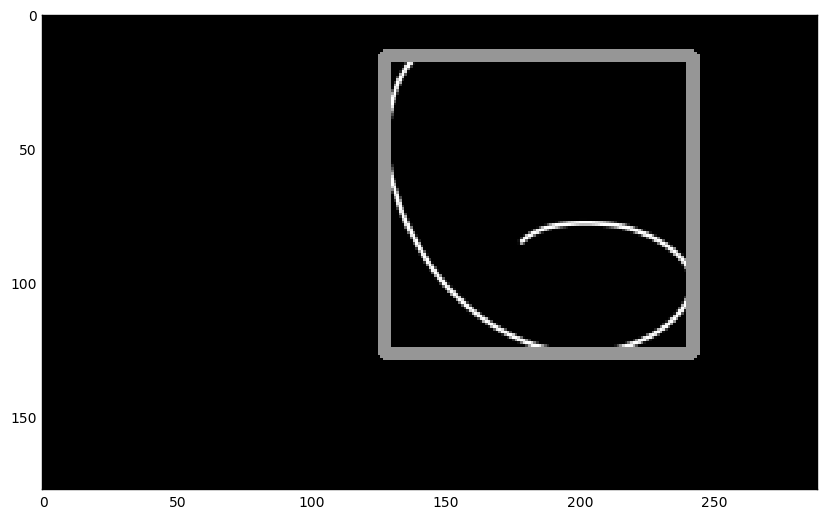

predicted class is: 6


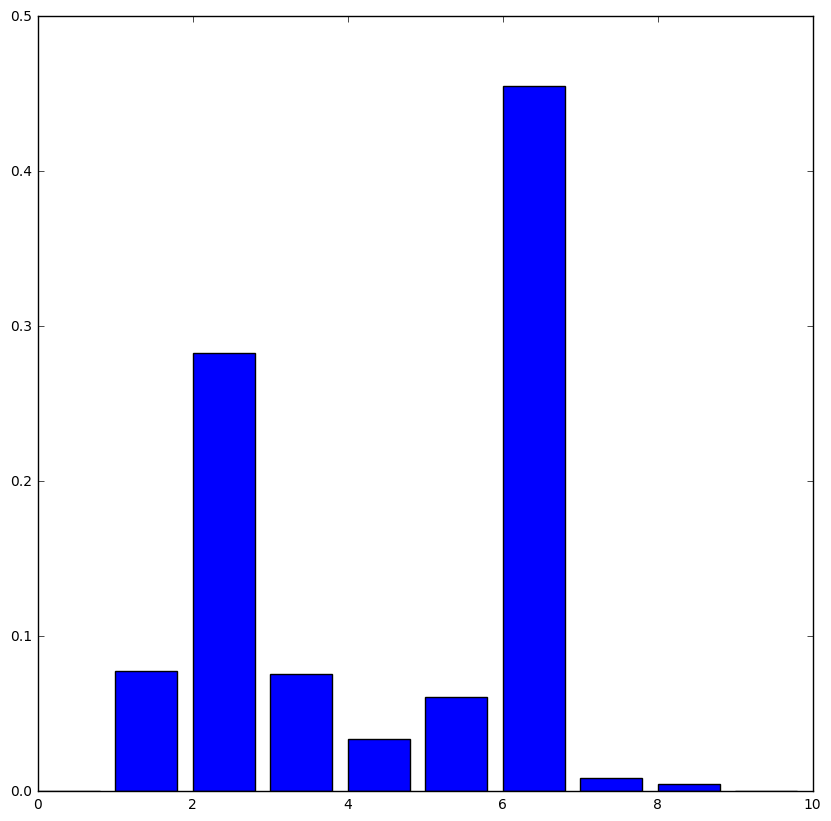

probability mass: [  4.54566383e-04   7.79200047e-02   2.82774806e-01   7.58934096e-02
   3.39937806e-02   6.06356859e-02   4.55200911e-01   8.59441981e-03
   4.53058816e-03   1.88340209e-06]
/Users/wxie/Desktop/images/aidu.png


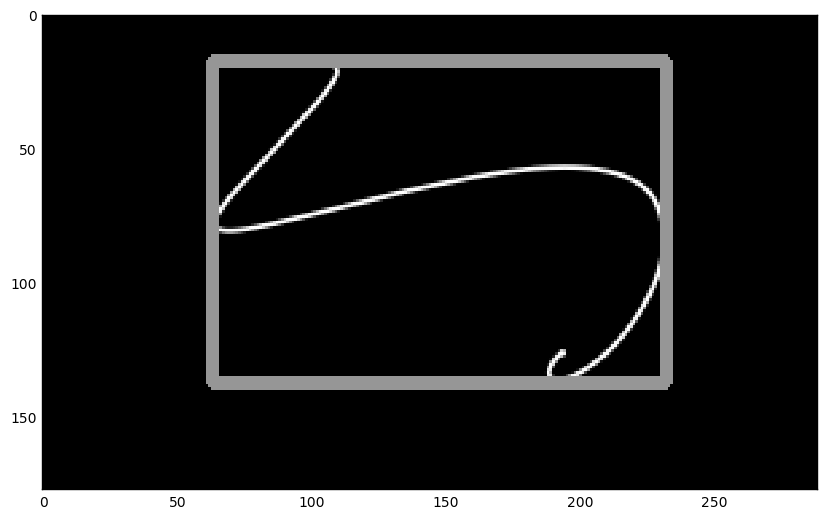

predicted class is: 7


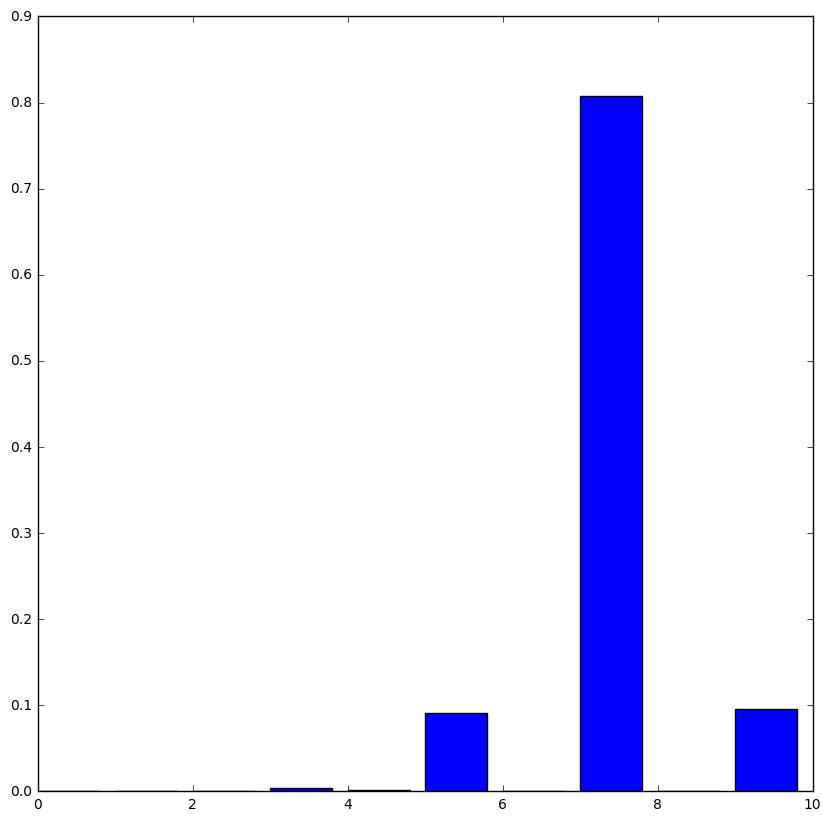

probability mass: [  4.28963860e-04   7.62016425e-05   1.03653503e-04   3.42452154e-03
   1.88546744e-03   9.11777765e-02   4.14990791e-05   8.07473004e-01
   1.39590611e-05   9.53749567e-02]
/Users/wxie/Desktop/images/eredu.png


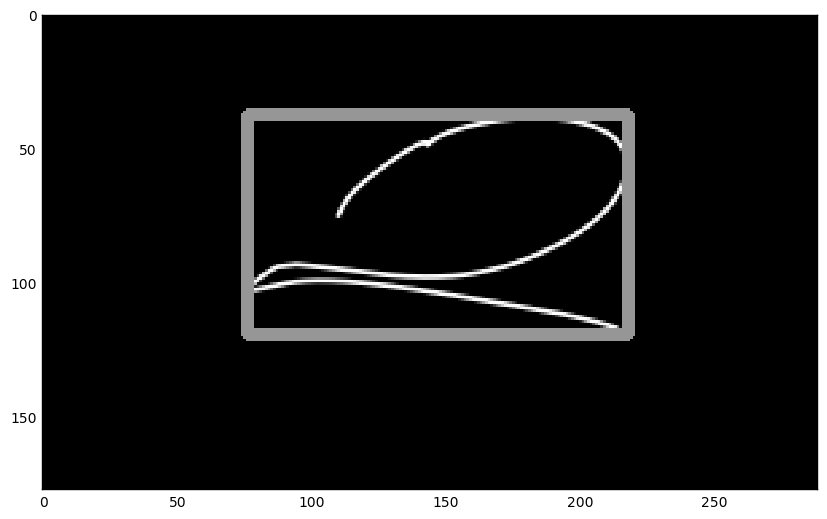

predicted class is: 4


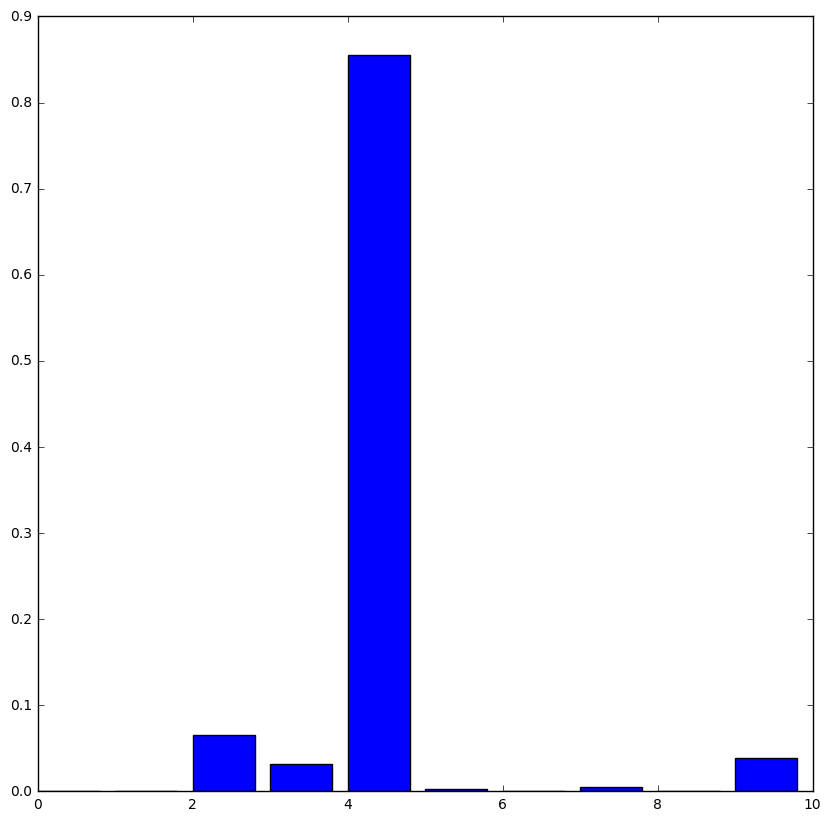

probability mass: [  1.75459047e-06   2.64024075e-05   6.53341934e-02   3.19435894e-02
   8.54978144e-01   2.42973166e-03   2.50856573e-07   5.18053630e-03
   7.73656415e-04   3.93317603e-02]
/Users/wxie/Desktop/images/mooru.png


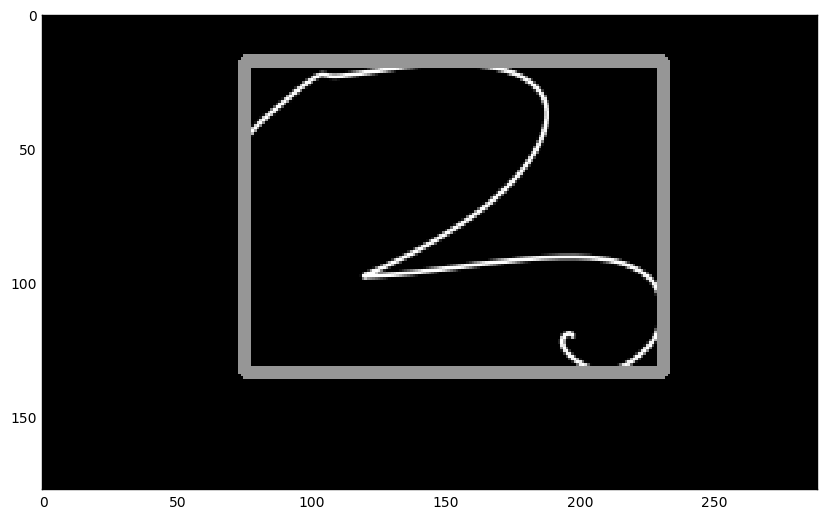

predicted class is: 3


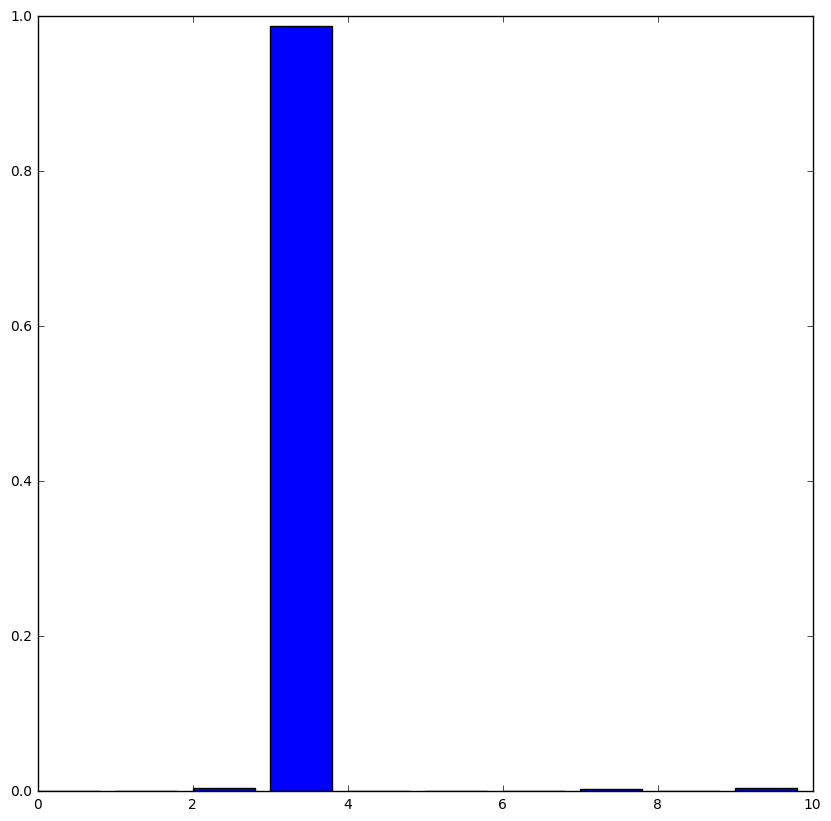

probability mass: [  4.83562872e-07   3.76735661e-05   4.62108571e-03   9.87567782e-01
   1.30364265e-06   7.76879187e-06   7.09703158e-08   2.94817076e-03
   2.48778724e-05   4.79076477e-03]
/Users/wxie/Desktop/images/nnaku.png


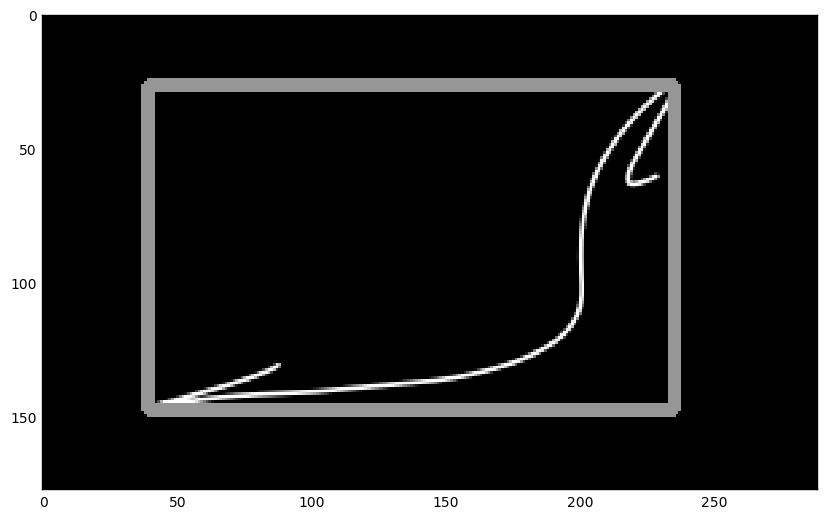

predicted class is: 3


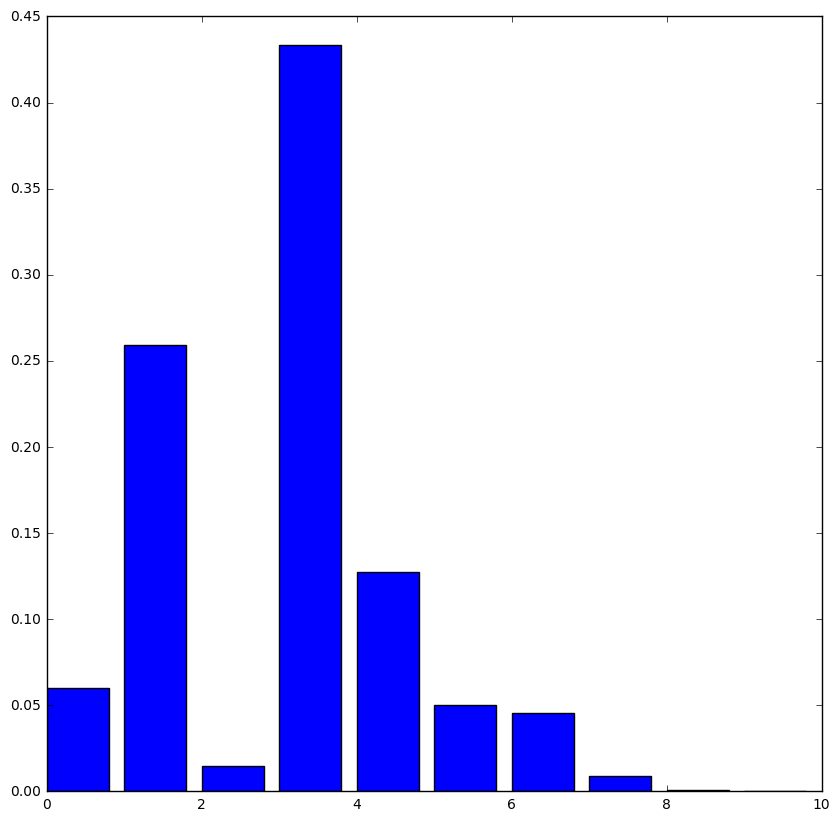

probability mass: [  5.98399751e-02   2.59090930e-01   1.47278225e-02   4.33256388e-01
   1.27301112e-01   5.04440665e-02   4.53834794e-02   8.96222051e-03
   6.19540398e-04   3.74405237e-04]
/Users/wxie/Desktop/images/ombattu.png


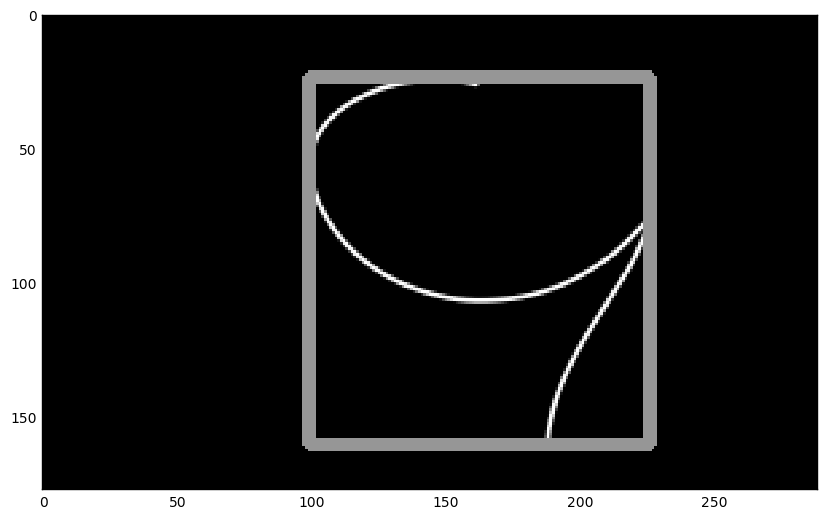

predicted class is: 4


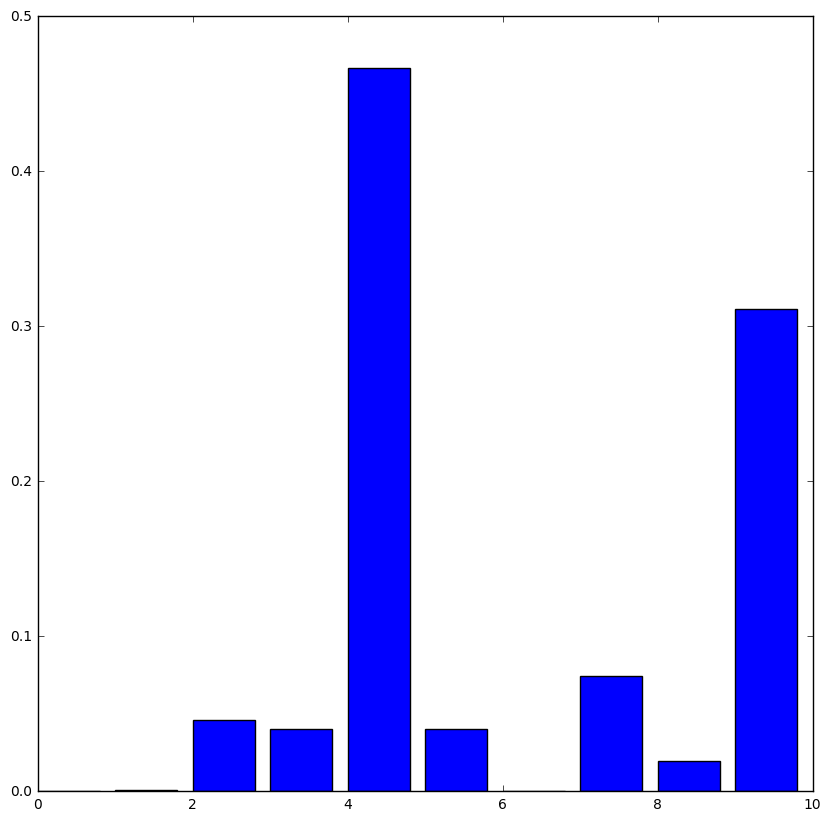

probability mass: [  2.00330949e-04   6.14731514e-04   4.63724881e-02   4.00636420e-02
   4.66719449e-01   4.04976830e-02   1.92242529e-04   7.42475316e-02
   1.96280628e-02   3.11463892e-01]
/Users/wxie/Desktop/images/ondu.png


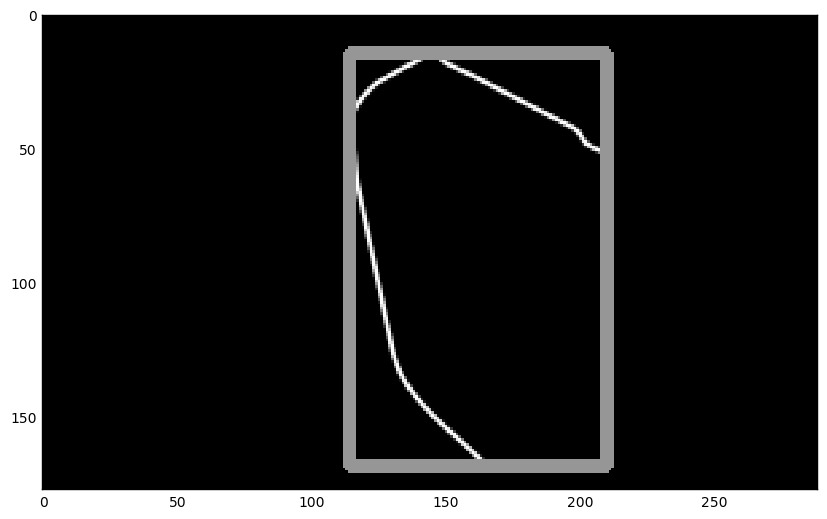

predicted class is: 8


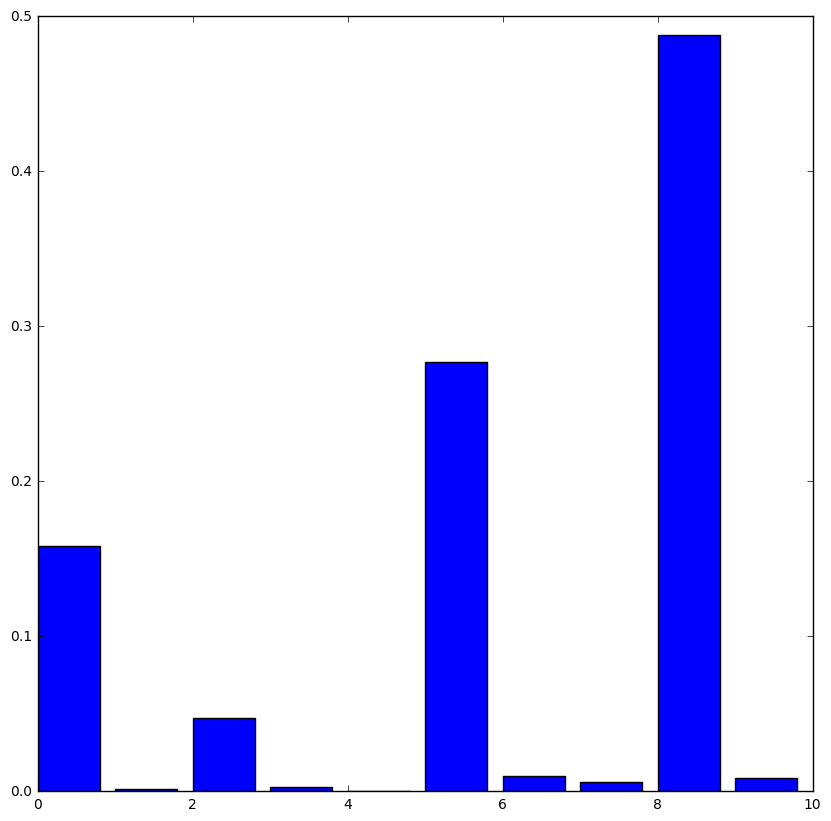

probability mass: [  1.58510461e-01   1.37673330e-03   4.70966399e-02   2.89492891e-03
   2.37149243e-06   2.76994765e-01   1.00035602e-02   6.23081904e-03
   4.88234282e-01   8.65545031e-03]
/Users/wxie/Desktop/images/sonne.png


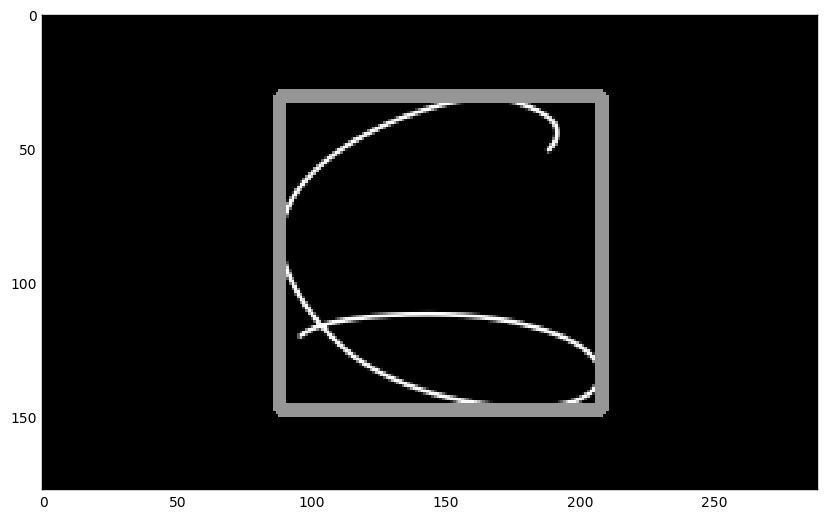

predicted class is: 5


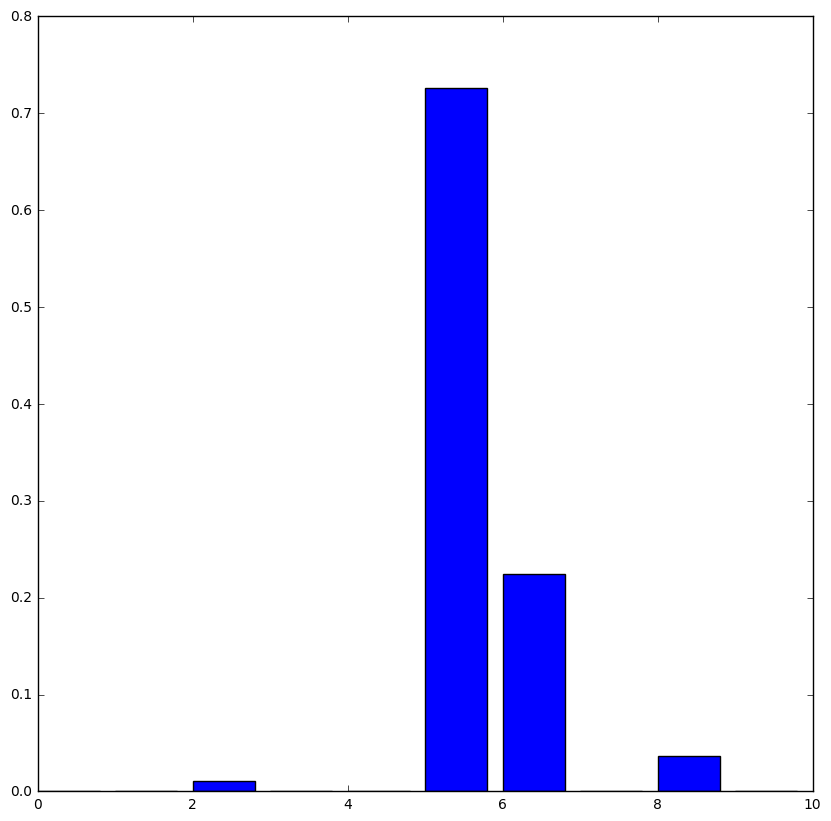

probability mass: [  3.24610417e-04   4.23651072e-05   1.05832657e-02   8.23394395e-04
   1.02325037e-04   7.26437211e-01   2.24188820e-01   1.31647568e-04
   3.67571451e-02   6.09211333e-04]
/Users/wxie/Desktop/images/yelu.png


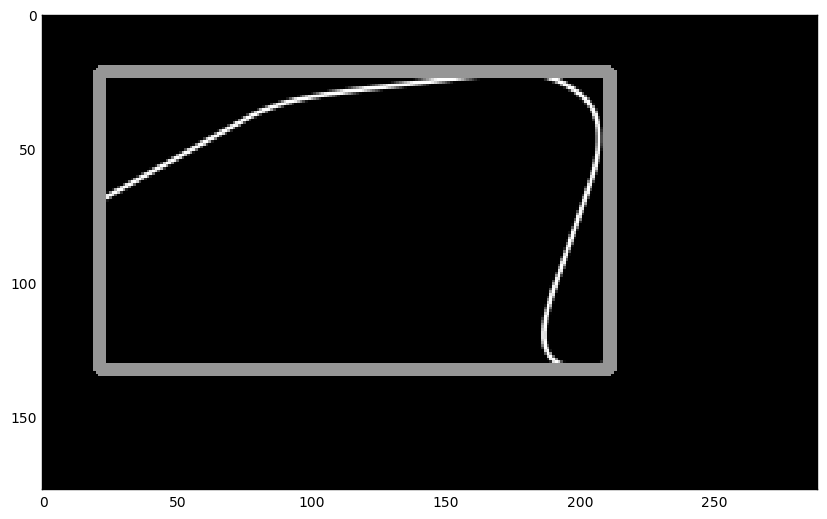

predicted class is: 7


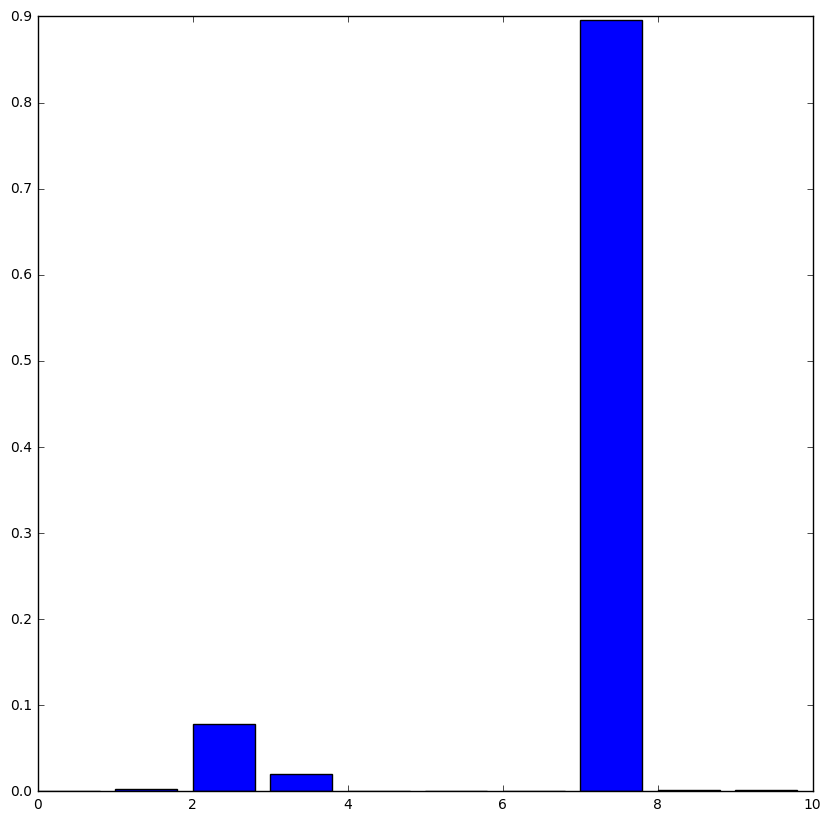

probability mass: [  8.82184424e-04   2.32310523e-03   7.80493617e-02   2.03105565e-02
   6.04913566e-06   1.91181080e-05   5.64142647e-06   8.95853460e-01
   1.38562196e-03   1.16494216e-03]


In [8]:
def bounding_box (img):
    new_img = img.copy()
    bound = 30
    new_img = new_img[bound:-bound, bound:-bound]
    rows, cols = new_img.shape
    x_max = 0
    x_min = rows 
    y_max = 0
    y_min = cols
    # get bounding box
    for x in range(rows):
        for y in range(cols):
            if new_img[x,y] != 0:
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
                    
    cv2.rectangle(new_img, (y_min, x_min), (y_max, x_max), 150, 3) 

    return new_img
            
def brighter (img):
    new_img = img.copy()
    rows, cols = new_img.shape
    for x in range(rows):
        for y in range(cols):
            if new_img[x,y] != 0:
                new_img[x,y] = min(255, new_img[x,y] + 150)
    return new_img


image_dir = '/Users/wxie/Desktop/images/'

for image_name in filter(lambda s: '.png' in s, 
                         os.listdir('/Users/wxie/Desktop/images/')):
    img = cv2.imread(image_dir + image_name, 0)
    print(image_dir + image_name)
    # bounding box
    bb_img = bounding_box(img)

    # downsample
    img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)

    # intensity preprocessing
    img = brighter(img)
    img = img / 255.
    plt.figure()
    plt.imshow(bb_img)    
    plt.show()

    
    # copy the image data into the memory allocated for the net
    net.blobs['data'].data[...] = img

    ### perform classification
    output = net.forward()

    output_prob = output['prob'][0]  # the output probability vector for the first image in the batch

    print 'predicted class is:', output_prob.argmax()

    width = 0.80
    plt.figure()
    plt.bar(range(10), output_prob, width)
    plt.show()
    print 'probability mass:', output_prob

